In [2]:
using Pkg
# Pkg.add("DifferentialEquations")
# Pkg.add("ModelingToolkit")
# Pkg.add("DataFrames")
# Pkg.add("Plots")
# Pkg.add("Statistics")
# Pkg.add("StaticArrays")


using Plots
using DifferentialEquations
using DataFrames
using StaticArrays
using Statistics
using Sundials
# using CairoMakie

# Cas Du modèle de Bauch

In [ ]:
function bauch!(dN,N0,param,t)
    
mu,gamma,kappa,omega,beta =param

S = N0[1]
I = N0[2]
x = N0[3]

    dN[1] = mu * (1 - x) - beta* S *I -mu*S
    dN[2] = beta* S *I - mu*I - gamma*I
    dN[3] = kappa * x * (1 -x) *(I*omega -1)

end                     
         
function bauch_triche!(dN,N0,param,t)
    
    mu,gamma,kappa,omega,beta =param
    
    S = N0[1]
    I = N0[2]
    x = N0[3]
    
        dN[1] = mu * (1 - x) - beta* S *I -mu*S - 1e-8
        dN[2] = beta* S *I - mu*I - gamma*I +  1e-8
        dN[3] = kappa * x * (1 -x) *(I*omega -1)
    
    end      



function bauch_evo!(dN,N0,param,t)

    B,d,p1,p2,d,var,gamma0,kappa,omega =param
    
    S = N0[1]
    I = N0[2]
    x = N0[3]
    
    dN[1] = B*(1-x) - d *S - trans(vir,p1,p2) * S *I
    dN[2] = trans(vir,p1,p2) * S *I - (d + vir)*I
    dN[3] = var *(trans2(vir,p1,p2) * (S + gamma0 * I) - 1 ) 
    dN[4] = kappa * x *(1 - x) * ( omega*I - 1)
    
end 

    

In [ ]:
tmax= 365*12*10
tspan = (0.0, tmax)
tstep = 0.001
#param
mu = 1/(365*50)
gamma = 0.1
kappa = 0.001
omega = 6000
beta = 10*(mu+gamma)
print(beta)
param = [mu ,gamma ,kappa ,omega ,beta]

S0 = 0.05
I0= 0.0001
x0 =0.95
N0 = [S0 ,I0,x0 ]

ode_bauch =  ODEProblem(bauch!,N0,tspan,param,saveat = tstep)
sol = solve(ode_bauch,Vern9(),isoutofdomain = (m,para,t) -> any(x->x<0, m),saveat=1)
sol = DataFrame(sol)
rename!(sol,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)


In [ ]:
# plot(sol[:,1],sol[:,2])

x = sol.time

y1 = sol.S
y2 = sol.I
y3 = sol.x

# Création du graphique
plot(x, y1, label="Sains", color="green", linewidth=2)
plot!(x, y2, label="Infectés", color="red", linewidth=2)
plot!(x, y3, label="Coopérateurs", color="blue", linewidth=2)

# Ajout du titre et des labels
title!("Dynamiques des sains, infectés et coopérateurs")
xlabel!("Temps")
ylabel!("Population")

In [ ]:
kappa_vec = [0.0001,0.0005,0.001,0.005]
omega_vec = [1500,2100,3200,4500]


mu = 1/(365*50)
gamma = 0.1
beta = 10*(mu+gamma)
tmax= 365*12*100
tspan = (0.0, tmax)
tstep = 0.001
S0 = 0.05
I0= 0.0001
x0 =0.95
N0 = [S0 ,I0,x0 ]


for omega in omega_vec
    for kappa in kappa_vec
# plot(sol[:,1],sol[:,2])
display("Parametres kappa: ",kappa," et omega: ", omega)
#param


param = [mu ,gamma ,kappa ,omega ,beta]



ode_bauch =  ODEProblem(bauch!,N0,tspan,param,saveat = tstep)
sol = solve(ode_bauch,Vern9(),isoutofdomain = (m,para,t) -> any(x->x<0, m),saveat=1)
sol = DataFrame(sol)
rename!(sol,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)

x = sol.time

y1 = sol.S
y2 = sol.I
y3 = sol.x

# Création du graphique
plt = plot(x, y1, label="Sains", color="green", linewidth=2)
plot!(x, y2, label="Infectés", color="red", linewidth=2)
plot!(x, y3, label="Coopérateurs", color="blue", linewidth=2)

# Ajout du titre et des labels
title!("Dynamiques des sains, infectés et coopérateurs")
xlabel!("Temps")
ylabel!("Population")

display(plt)
    end
end

In [ ]:
kappa_vec = [0.0001,0.0005,0.001,0.005]
omega_vec = [1500,2100,3200,4500]


mu = 1/(365*50)
gamma = 0.1
beta = 10*(mu+gamma)
tmax= 365*12*100
tspan = (0.0, tmax)
tstep = 0.001
S0 = 0.05
I0= 0.0001
x0 =0.95
N0 = [S0 ,I0,x0 ]


for omega in omega_vec
    for kappa in kappa_vec
# plot(sol[:,1],sol[:,2])
print("Parametres kappa: ",kappa," et omega: ", omega)
#param


param = [mu ,gamma ,kappa ,omega ,beta]



ode_bauch =  ODEProblem(bauch!,N0,tspan,param,saveat = tstep)
sol = solve(ode_bauch,KenCarp4(),saveat=1)
sol = DataFrame(sol)
rename!(sol,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)

x = sol.time

y1 = sol.S
y2 = sol.I
y3 = sol.x

# Création du graphique
plt = plot(x, y1, label="Sains", color="green", linewidth=2)
plot!(x, y2, label="Infectés", color="red", linewidth=2)
plot!(x, y3, label="Coopérateurs", color="blue", linewidth=2)

# Ajout du titre et des labels
title!("Dynamiques des sains, infectés et coopérateurs")
xlabel!("Temps")
ylabel!("Population")

display(plt)
    end
end

In [ ]:
kappa_vec = [0.0001,0.0005,0.001,0.005]
omega_vec = [1500,2100,3200,4500]


mu = 1/(365*50)
gamma = 0.1
beta = 10*(mu+gamma)
tmax= 365*12*100
tspan = (0.0, tmax)
tstep = 0.001
S0 = 0.05
I0= 0.0001
x0 =0.95
N0 = [S0 ,I0,x0 ]


for omega in omega_vec
    for kappa in kappa_vec
# plot(sol[:,1],sol[:,2])
print("Parametres kappa: ",kappa," et omega: ", omega)
#param


param = [mu ,gamma ,kappa ,omega ,beta]



ode_bauch =  ODEProblem(bauch!,N0,tspan,param,saveat = tstep)
sol = solve(ode_bauch,Rodas4(),saveat=1)
sol = DataFrame(sol)
rename!(sol,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)

x = sol.time

y1 = sol.S
y2 = sol.I
y3 = sol.x

# Création du graphique
plt = plot(x, y1, label="Sains", color="green", linewidth=2)
plot!(x, y2, label="Infectés", color="red", linewidth=2)
plot!(x, y3, label="Coopérateurs", color="blue", linewidth=2)

# Ajout du titre et des labels
title!("Dynamiques des sains, infectés et coopérateurs")
xlabel!("Temps")
ylabel!("Population")

display(plt)
    end
end

In [ ]:
kappa_vec = [0.0001,0.0005,0.001,0.002]
omega_vec = [1500,2100,3200,4500]


mu = 1/(365*50)
gamma = 0.1
beta = 10*(mu+gamma)
tmax= 365*12*100
tspan = (0.0, tmax)
tstep = 0.001
S0 = 0.05
I0= 0.0001
x0 =0.95
N0 = [S0 ,I0,x0 ]


for omega in omega_vec
    for kappa in kappa_vec
# plot(sol[:,1],sol[:,2])
print("Parametres kappa: ",kappa," et omega: ", omega)
#param


param = [mu ,gamma ,kappa ,omega ,beta]



ode_bauch =  ODEProblem(bauch!,N0,tspan,param,saveat = tstep)
sol = solve(ode_bauch,Vern9(),saveat=1)
sol = DataFrame(sol)
rename!(sol,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)

x = sol.time

y1 = sol.S
y2 = sol.I
y3 = sol.x

# Création du graphique
plt = plot(x, y1, label="Sains", color="green", linewidth=2)
plot!(x, y2, label="Infectés", color="red", linewidth=2)
plot!(x, y3, label="Coopérateurs", color="blue", linewidth=2)

# Ajout du titre et des labels
title!("Dynamiques des sains, infectés et coopérateurs")
xlabel!("Temps")
ylabel!("Population")

display(plt)
    end
end

### Diagramme de bifurcation à 2 paramètres 

In [ ]:
nbr_val =100
kappa_vec = range(0.0001,stop = 0.002,length = nbr_val)
omega_vec = range(1100,stop = 6000,length = nbr_val)

tab_res = zeros(nbr_val, nbr_val)

mu = 1/(365*50)
gamma = 0.1
beta = 10*(mu+gamma)

tmax= 365*12*200

tspan = (0.0, tmax)
tstep = 0.001
S0 = 0.1
I0= 0.01
x0 =0.95
N0 = [S0 ,I0,x0 ]


for i in 1:length(kappa_vec)
    for y in 1:length(omega_vec)
# plot(sol[:,1],sol[:,2])
#print("Parametres kappa: ",kappa," et omega: ", omega)
#param

omega = omega_vec[y]
kappa = kappa_vec[i]

param = [mu ,gamma ,kappa ,omega ,beta]



ode_bauch =  ODEProblem(bauch!,N0,tspan,param)
sol = solve(ode_bauch,Vern9(),saveat=1,abstol = 1e-12,reltol = 1e-12,isoutofdomain = (m,para,t) -> any(x->x<0, m))
sol = DataFrame(sol)
rename!(sol,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)

nb_pas = length(sol.time)


last_10per = ( nb_pas - (round(Int,nb_pas/10)-100) : nb_pas-100)


xmin = minimum(sol.x[last_10per])

xmax = maximum(sol.x[last_10per])

if sol.I[nb_pas-100] < -1e-12
tab_res[y,i] = 4 
print(sol.I[nb_pas-100])
elseif sol.x[nb_pas-100] <0.0001 
    tab_res[y,i] = 1
elseif xmax - xmin <0.01
    tab_res[y,i] = 2
elseif xmax - xmin >0.01
    tab_res[y,i] = 3
end


    end
end



In [ ]:



custom_colors = ["purple","blue", "yellow", "red"]


heatmap(kappa_vec, omega_vec, tab_res, levels=[0,1,2,3], color=custom_colors)

xlabel!("Kappa")
ylabel!("Omega")
title!("Diagramme de bifurcation (Modèle de Bauch)")



# Cas classique 

## Défintion paramètres

In [30]:
#Paramètre 
@kwdef struct parma_evo_comp
    B::Float64 = 1.0
    d::Float64 = 1.0
    var::Float64 = 1.0
    gamma0::Float64 = 0.1
    vit1::Float64 = 50.0
    kappa::Float64 = 0.1
    p1::Float64 = 10.0
    p2::Float64 = 1.0
    trans::Float64 = 10.0
    mort::Float64 = 1.0
    param_form1::Float64 = 1.0
    param_form2::Float64 = 0.0
end

param_basic = parma_evo_comp()


#Condition initiale

@kwdef struct IniV_evo_comp
    S0::Float64 = 0.9
    I0::Float64 = 0.1
    v0::Float64 = 0.5
    x0::Float64 = 0.5
    y0::SVector{3,Float64} = SVector(S0,I0,x0)
    u0::SVector{4,Float64} = SVector(S0,I0,v0,x0)
end

@show iniv = IniV_evo_comp()

# @kwdef struct IniV_comp
#     S0::Float64 = 0.9
#     I0::Float64 = 0.1
#     x0::Float64 = 0.5
#     u0::SVector{3,Float64} = SVector(S0,I0,x0)
# end

# @show iniv_comp = IniV_comp()


@kwdef struct ParTime
    tspan::Tuple{Float64,Float64} = (0.0,2000)
    tstep::Float64 = 0.1
end

ptime =ParTime()

ParTime((0.0, 2000.0), 0.1)

### Définition des fonctions

In [4]:
# Structure de param


function mod_vac_evo_comp(init::SVector{4}, p::parma_evo_comp, t)
    (;B,d,var,gamma0,vit1,kappa,p1,p2,param_form1,param_form2) = p

    S =init[1]
    I =init[2]
    vir =init[3]
    x = init[4]


    dS = B*(1-x) - d *S - beta1(vir,p) * S *I
    dI = beta1(vir,p) * S *I - (d +  vir)*I
    dv = var *(beta2(vir,p) * (S + gamma0 * I) - 1 ) 
    dx = vit1 * x *(1 - x) * ((abs(vir) ^param_form2) * (abs(I) ^ param_form1)  - kappa)
    return SVector(dS,dI,dv,dx)
end



function mod_vac_comp(init::SVector{3}, p::parma_evo_comp, t)
    (;B,d,vit1,kappa,trans,mort,param_form1,param_form2) = p

    S =init[1]
    I =init[2]
    x = init[3]


    dS = B*(1-x) - d *S - trans * S *I
    dI = trans * S * I - (d + mort)*I
    dx = vit1 * x *(1 - x) * ( (abs(mort) ^param_form2) * (abs(I) ^ param_form1) - kappa)
    return SVector(dS,dI,dx)
end


 

function transmission(x::Real,p::parma_evo_comp)
    (;p1,p2) = p
    return (p1*x^p2)
end

function transmission2(x::Real,p::parma_evo_comp)
    (;p1,p2) = p
    return (p1*p2*x^(p2-1))
end


function beta1(x::Real,p::parma_evo_comp)
    (;p1,p2) = p
    return ((x*p1)/(p2+x))
end

function beta2(x::Real,p::parma_evo_comp)
    (;p1,p2) = p
    return ((p1*p2)/(p2+x)^2)
end

beta2 (generic function with 1 method)

### Paramètres et cond initiales

### Fonction de simulation

In [5]:
function sim_mod(init ,p::parma_evo_comp ,pt::ParTime,solveur )
    (;tspan,tstep) = pt
    (; u0) = init
    
    prob_mod = ODEProblem(mod_vac_evo_comp,u0,tspan,p,saveat = tstep)
    sol_mod = solve(prob_mod,solveur,abstol = 1e-12,reltol = 1e-12)
    sol_mod = DataFrame(sol_mod)
    rename!(sol_mod,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :v, :value4 => :x)
    return sol_mod
end 
# ,isoutofdomain = (m,para,t) -> any(x->x<0, m)
function sim_mod_nocomp(init ,p::parma_evo_comp ,pt::ParTime ,solveur)
    (;tspan,tstep) = pt
    (; y0) = init
    
    prob_mod = ODEProblem(mod_vac_comp,y0,tspan,p,saveat = tstep)
    sol_mod = solve(prob_mod,solveur,abstol = 1e-12,reltol = 1e-12)
    sol_mod = DataFrame(sol_mod)
    rename!(sol_mod,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)
    return sol_mod
end




function diagram_bif(nbr_val::Real,pt::ParTime,p_form1::Float64 ,p_form2::Float64,solveur)
    kappa_vec = range(0.1,stop = 0.5,length = nbr_val)
    vit1_vec = range(1,stop = 100,length = nbr_val)
    tab_res = zeros(nbr_val, nbr_val)

    
    
    # BOucle pour les diagrammes bif 
    for i in 1:length(kappa_vec)
        for y in 1:length(vit1_vec)
    
    # plot(sol[:,1],sol[:,2])
    #print("Parametres kappa: ",kappa," et omega: ", omega)
    #param
    
        kappa_mod = kappa_vec[i]
        vit1_mod = vit1_vec[y]
            
        param_bif = parma_evo_comp(kappa = kappa_mod,vit1 =vit1_mod,p1 = 10,p2 = 0.5 ,param_form1 = p_form1,param_form2 =p_form2) 
        sol = sim_mod(iniv,param_bif,pt,solveur)
    
        nb_pas = length(sol.time)
        last_10per = ( nb_pas - (round(Int,nb_pas/4)) : nb_pas)
                
        xmin = minimum(sol.x[last_10per])
    
        xmax = maximum(sol.x[last_10per])

        cond1 = minimum(sol.S[last_10per])
    
        cond2 = maximum(sol.S[last_10per])
    
        if sol.I[nb_pas] < -1e-12
            tab_res[y,i] = 5
            print(sol.I[nb_pas])
        elseif (sol.x[nb_pas] > 0.99999 && sol.x[nb_pas-100] > 0.99999 && sol.x[nb_pas-200] > 0.99999)
            tab_res[y,i] = 4
        elseif sol2.x[nb_pas] <1e-12 && (xmax - xmin < 0.0001  || cond2 - cond1 < 0.0001  ) #&& sol2.x[nb_pas-1000] <1e-12 && sol2.x[nb_pas-700] <1e-12
            tab_res[y,i] = 1
        elseif xmax - xmin <0.01
            tab_res[y,i] = 2
        elseif xmax - xmin >0.01
            tab_res2[y,i] = 3
        end

    
            end
        end
    
        return tab_res
    
end



function comparaison_diagramme_biff(nbr_val::Real,pt::ParTime,p_form1::Float64 ,p_form2::Float64)
    kappa_vec = range(0.1,stop = 0.5,length = nbr_val)
    vit1_vec = range(1,stop = 100,length = nbr_val)
    tab_res = zeros(nbr_val, nbr_val)
    tab_res2 = zeros(nbr_val, nbr_val)


# BOucle pour les diagrammes bif 
    for i in 1:length(kappa_vec)
        for y in 1:length(vit1_vec)

# plot(sol[:,1],sol[:,2])
#print("Parametres kappa: ",kappa," et omega: ", omega)
#param

        kappa_mod = kappa_vec[i]
        vit1_mod = vit1_vec[y]
        
        param_bif = parma_evo_comp(kappa = kappa_mod,vit1 =vit1_mod,p1 = 10,p2 = 0.5 ,param_form1 = p_form1,param_form2 =p_form2) 
        sol = sim_mod(iniv,param_bif,pt,Vern9())

        nb_pas = length(sol.time)
        last_10per = ( nb_pas - (round(Int,nb_pas/4)) : nb_pas)
            
        xmin = minimum(sol.x[last_10per])

        xmax = maximum(sol.x[last_10per])

        if sol.I[nb_pas] < -1e-12
        tab_res[y,i] = 5
        elseif sol.x[nb_pas] > 0.99999
        tab_res[y,i] = 4
        elseif sol.x[nb_pas] <1e-12 && xmax - xmin < 0.0001 #&& sol.x[nb_pas-1000] <1e-12 && sol.x[nb_pas-700] <1e-12
            tab_res[y,i] = 1
        elseif xmax - xmin <0.01
            tab_res[y,i] = 2
        elseif xmax - xmin >0.01
            tab_res[y,i] = 3
        end



            
        vir_mean = mean(sol.v[last_10per])
        trans_mean = (param_bif.p1 *vir_mean  )/(vir_mean + param_bif.p2)

        
        param_bif2 = parma_evo_comp(kappa = kappa_mod, vit1 =vit1_mod, trans = trans_mean, mort = vir_mean ,param_form1 = p_form1,param_form2 =p_form2) 

        sol2 = sim_mod_nocomp(iniv ,param_bif2,ptime ,Vern9())

        # ode_bauch =  ODEProblem(bauch!,N0,tspan,p(vit1 = vit1_mod,kappa = kappa_mod))
        # sol = solve(mod_vac_evo_comp,Vern9(),saveat=1,abstol = 1e-12,reltol = 1e-12,isoutofdomain = (m,para,t) -> any(x->x<0, m))
        nb_pas2 = length(sol2.time)
        last_10per2 = ( nb_pas2 - (round(Int,nb_pas2/10)) : nb_pas2)

        xmin2 = minimum(sol2.x[last_10per2])

        xmax2 = maximum(sol2.x[last_10per2])

        cond1 = minimum(sol2.S[last_10per2])

        cond2 = maximum(sol2.S[last_10per2])



        if sol2.I[nb_pas2] < -1e-12
        tab_res2[y,i] = 5
        print(sol2.I[nb_pas2])
        elseif sol2.x[nb_pas2] > 0.99999
            tab_res2[y,i] = 4
        elseif sol2.x[nb_pas2] <1e-12 && (xmax2 - xmin2 < 0.0001  || cond2 - cond1 < 0.0001  ) #&& sol2.x[nb_pas-1000] <1e-12 && sol2.x[nb_pas-700] <1e-12
            tab_res2[y,i] = 1
        elseif xmax2 - xmin2 <0.01
            tab_res2[y,i] = 2
        elseif xmax2 - xmin2 >0.01
            tab_res2[y,i] = 3
        end

        end
    end

    return tab_res, tab_res2

end


comparaison_diagramme_biff (generic function with 1 method)

#### Diagramme de bifurcation à 1 paramètre

In [8]:


function diagramme_biff_1p(nbr_val::Real,pt::ParTime)
    
    kappa_vec = range(0.01,stop = 0.99,length = nbr_val)

    tab_res = zeros(nbr_val, nbr_val)
    tab_res2 = zeros(nbr_val, nbr_val)


# BOucle pour les diagrammes bif 
    for i in 1:length(kappa_vec)

# plot(sol[:,1],sol[:,2])
#print("Parametres kappa: ",kappa," et omega: ", omega)
#param

        kappa_mod = kappa_vec[i]

        
        param_bif = parma_evo_comp(kappa = kappa_mod,vit1 =vit1_mod ) 
        sol = sim_mod(iniv,param_bif,pt,Vern9())
       
        nb_pas = length(sol.time)
        last_10per = ( nb_pas - (round(Int,nb_pas/10)) : nb_pas)
            
        xmin = minimum(sol.x[last_10per])

        xmax = maximum(sol.x[last_10per])

        if sol.I[nb_pas] < -1e-12
        tab_res[y,i] = 4 
        print(sol.I[nb_pas])
        elseif sol.x[nb_pas] <1e-8
            tab_res[y,i] = 1
        elseif xmax - xmin <0.01
            tab_res[y,i] = 2
        elseif xmax - xmin >0.01
            tab_res[y,i] = 3
        end



            
        vir_mean = mean(sol.v[last_10per])
        trans_mean = (param_bif.p1 *vir_mean  )/(vir_mean + param_bif.p2)

      
        param_bif2 = parma_evo_comp(kappa = kappa_mod, vit1 =vit1_mod, trans = trans_mean, mort = vir_mean ) 

        sol2 = sim_mod_nocomp(iniv ,param_bif2,ptime,Vern9() )

        nb_pas = length(sol2.time)
        last_10per2 = ( nb_pas - (round(Int,nb_pas/10)) : nb_pas)
        # ode_bauch =  ODEProblem(bauch!,N0,tspan,p(vit1 = vit1_mod,kappa = kappa_mod))
        # sol = solve(mod_vac_evo_comp,Vern9(),saveat=1,abstol = 1e-12,reltol = 1e-12,isoutofdomain = (m,para,t) -> any(x->x<0, m))


        xmin2 = minimum(sol2.x[last_10per2])

        xmax2 = maximum(sol2.x[last_10per2])

        if sol2.I[nb_pas2] < -1e-12
        tab_res2[y,i] = 4 
        print(sol2.I[nb_pas2])
        elseif sol2.x[nb_pas2] <1e-12 && sol2.x[nb_pas2-1000] <1e-12 && sol2.x[nb_pas2-700] <1e-12 && sol2.x[nb_pas2-300] <1e-12
            tab_res2[y,i] = 1
        elseif xmax2 - xmin2 <0.01
            tab_res2[y,i] = 2
        elseif xmax2 - xmin2 >0.01
            tab_res2[y,i] = 3
        end


    end

    return tab_res, tab_res2

end

diagramme_biff_1p (generic function with 1 method)

### Fonction de plot 

In [7]:
function diagramme(x,y,z)


    custom_colors = ["blue", "yellow", "red"]


    heatmap(x, y, z, levels=[1,2,3], color=custom_colors)

    xlabel!("Coût coopération")
    ylabel!("Taux de rencontre")
    title!("Diagramme de bifurcation (Modèle de Bauch)")
    
end

function time_plot(sol)
    x = sol.time

    y1 = sol.S
    y2 = sol.I
    y3 = sol.x

    # Création du graphique
    plt = plot(x, y1, label="Sains", color="green", linewidth=2)
    plot!(x, y2, label="Infectés", color="red", linewidth=2)
    plot!(x, y3, label="Coopérateurs", color="blue", linewidth=2)

    # Ajout du titre et des labels
    title!("Dynamiques des sains, infectés et coopérateurs")
    xlabel!("Temps")
    ylabel!("Densité")

    return plt
end




time_plot (generic function with 1 method)

#### Série temporelle 

In [9]:
function mod_vac_evo_comp(init::Vector{Float64}, p::parma_evo_comp, t)
    (;B,d,var,gamma0,vit1,kappa,p1,p2,param_form1,param_form2) = p

    S =init[1]
    I =init[2]
    vir =init[3]
    x = init[4]


    dS = B*(1-x) - d *S - beta1(vir,p) * S *I
    dI = beta1(vir,p) * S *I - (d +  vir)*I
    dv = var *(beta2(vir,p) * (S + gamma0 * I) - 1 ) 
    dx = vit1 * x *(1 - x) * ((abs(vir) ^param_form2) * (abs(I) ^ param_form1)  - kappa)
    return[dS,dI,dv,dx]
end

function sim_mod(init::Vector{Float64} ,p::parma_evo_comp ,pt::ParTime,solvee )
    (;tspan,tstep) = pt
    (; u0) = init
    
    prob_big = ODEProblem(mod_vac_evo_comp,u0,tspan,p,saveat = tstep)
    # prob_big = remake(prob_mod, u0=BigFloat.(prob_mod.u0), p=BigFloat.(prob_mod.p))

    sol_mod = solve(prob_big,solvee,abstol = 1e-20,reltol = 1e-20, maxiters=1e8)
    sol_mod = DataFrame(sol_mod)
    rename!(sol_mod,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :v, :value4 => :x)
    return sol_mod
end


ptime_serie =ParTime(tspan = (0,4000))
param_basic2 = parma_evo_comp(vit1 =90,kappa = 0.14,param_form1 = 0.5,param_form2 = 0.0) 
sol = sim_mod(iniv ,param_basic2 ,ptime_serie,CVODE_BDF() )


time_plot(sol)

MethodError: MethodError: no method matching Sundials.NVector(::SVector{4, Float64})
The type `Sundials.NVector` exists, but no method is defined for this combination of argument types when trying to construct it.

Closest candidates are:
  Sundials.NVector(!Matched::Vector{Float64})
   @ Sundials C:\Users\monau\.julia\packages\Sundials\2hgkX\src\nvector_wrapper.jl:16
  Sundials.NVector(!Matched::Ptr{Sundials._generic_N_Vector})
   @ Sundials C:\Users\monau\.julia\packages\Sundials\2hgkX\src\nvector_wrapper.jl:24


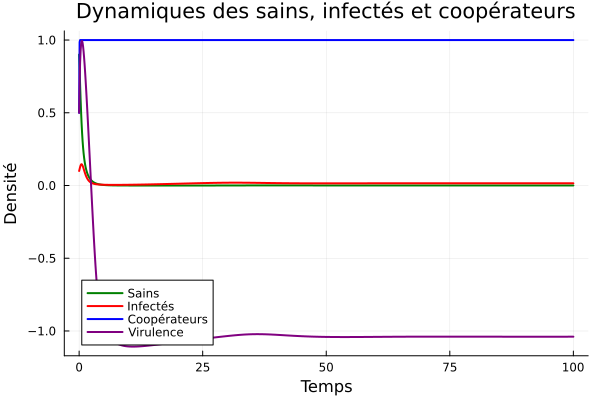

In [33]:

ptime_serie =ParTime(tspan = (0,100))
param_basic2 = parma_evo_comp(vit1 =90,kappa = 0.14,param_form1 = 0.0,param_form2 = 1.0,p1 = 10,p2 = 1.2) 
sol = sim_mod(iniv ,param_basic2 ,ptime_serie,Vern9() )

x = sol.time

y1 = sol.S
y2 = sol.I
y3 = sol.x
y4 = sol.v

# Création du graphique
plt = plot(x, y1, label="Sains", color="green", linewidth=2)
plot!(x, y2, label="Infectés", color="red", linewidth=2)
plot!(x, y3, label="Coopérateurs", color="blue", linewidth=2)
plot!(x, y4, label="Virulence", color="purple", linewidth=2)

# Ajout du titre et des labels
title!("Dynamiques des sains, infectés et coopérateurs")
xlabel!("Temps")
ylabel!("Densité")


#### Diagramme de bifurcation à 1 paramètres

##### Taux de rencontre selon p2

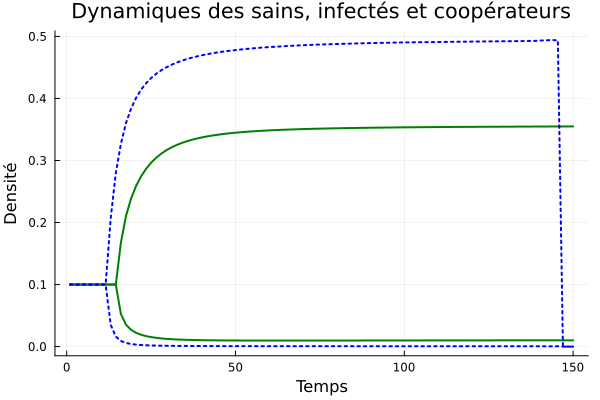

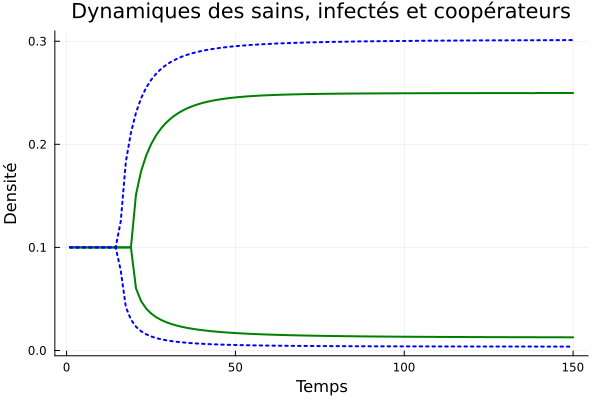

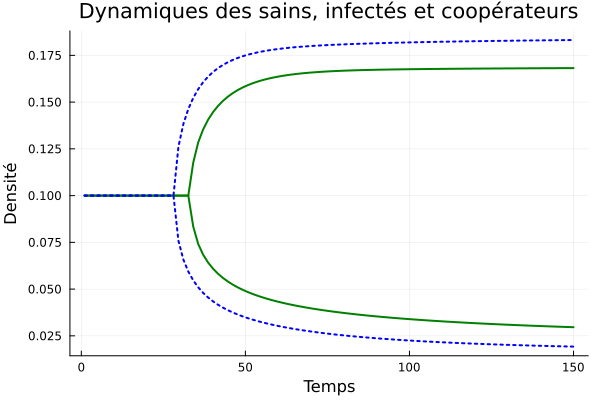

In [23]:
nbr_val =100
param1 = range(1,stop = 150,length = nbr_val)
param2 = range(0.7,stop = 2.5,length = 3)

tab_res = zeros(2, nbr_val)
tab_res2 = zeros(2, nbr_val)

ptime_bif_1 =ParTime(tspan = (0,5000))

# BOucle pour les diagrammes bif
for  y in param2
    for i in 1:length(param1)

    # plot(sol[:,1],sol[:,2])
    #print("Parametres kappa: ",kappa," et omega: ", omega)
    #param

        param1_mod = param1[i]

        # B::Float64 = 1.0
        # d::Float64 = 1.0
        # var::Float64 = 1.0
        # gamma0::Float64 = 0.1
        # vit1::Float64 = 50.0
        # kappa::Float64 = 0.1
        # p1::Float64 = 10.0
        # p2::Float64 = 1.0
        # trans::Float64 = 10.0
        # mort::Float64 = 1.0
        param_bif = parma_evo_comp(vit1 = param1_mod,p1 =11.5,p2 = y) 
        sol = sim_mod(iniv,param_bif,ptime_bif_1,Vern9())
    
        nb_pas = length(sol.time)
        last_10per = ( nb_pas - (round(Int,nb_pas/2)) : nb_pas)
            
        xmin = minimum(sol.I[last_10per])

        xmax = maximum(sol.I[last_10per])

        tab_res[1,i] = xmin
        tab_res[2,i] = xmax

            
        vir_mean = mean(sol.v[last_10per])
        trans_mean = (param_bif.p1 *vir_mean  )/(vir_mean + param_bif.p2)

    
        param_bif2 = parma_evo_comp(vit1 = param1_mod,p2 = y, trans = trans_mean, mort = vir_mean ) 

        sol2 = sim_mod_nocomp(iniv ,param_bif2,ptime_bif_1,Vern9() )

        # ode_bauch =  ODEProblem(bauch!,N0,tspan,p(vit1 = vit1_mod,kappa = kappa_mod))
        # sol = solve(mod_vac_evo_comp,Vern9(),saveat=1,abstol = 1e-12,reltol = 1e-12,isoutofdomain = (m,para,t) -> any(x->x<0, m))


        xmin2 = minimum(sol2.I[last_10per])

        xmax2 = maximum(sol2.I[last_10per])

        tab_res2[1,i] = xmin2
        tab_res2[2,i] = xmax2
    end

    ligne1_haut =tab_res[1,:]
    ligne1_bas =tab_res[2,:]

    ligne2_haut =tab_res2[1,:]
    ligne2_bas =tab_res2[2,:]


    # Création du graphique
    plt = plot(param1, ligne1_haut, label="complet", color="green", linewidth=2)
    plot!(param1, ligne1_bas, color="green", linewidth=2,legend = false)
    plot!(param1, ligne2_haut, label="Coopérateurs", color="blue", linewidth=2,linestyle=:dot)
    plot!(param1, ligne2_bas,  color="blue", linewidth=2,legend = false,linestyle=:dot)

    # Ajout du titre et des labels
    title!("Dynamiques des sains, infectés et coopérateurs")
    xlabel!("Temps")
    ylabel!("Densité")
    
    display(plt)
end 

##### Kappa selon var

In [ ]:
nbr_val =100
param1 = range(0.1,stop = 0.6,length = nbr_val)
param2 = range(0.1,stop = 10,length = 3)

tab_res = zeros(2, nbr_val)
tab_res2 = zeros(2, nbr_val)

ptime_bif_1 =ParTime(tspan = (0,5000))

# BOucle pour les diagrammes bif
for  y in param2
    for i in 1:length(param1)

    # plot(sol[:,1],sol[:,2])
    #print("Parametres kappa: ",kappa," et omega: ", omega)
    #param

        param1_mod = param1[i]

        # B::Float64 = 1.0
        # d::Float64 = 1.0
        # var::Float64 = 1.0
        # gamma0::Float64 = 0.1
        # vit1::Float64 = 50.0
        # kappa::Float64 = 0.1
        # p1::Float64 = 10.0
        # p2::Float64 = 1.0
        # trans::Float64 = 10.0
        # mort::Float64 = 1.0
        param_bif = parma_evo_comp(kappa= param1_mod,p1 =11.5,var = y) 
        sol = sim_mod(iniv,param_bif,ptime_bif_1,Vern9())
    
        nb_pas = length(sol.time)
        last_10per = ( nb_pas - (round(Int,nb_pas/2)) : nb_pas)
            
        xmin = minimum(sol.I[last_10per])

        xmax = maximum(sol.I[last_10per])

        tab_res[1,i] = xmin
        tab_res[2,i] = xmax

            
        vir_mean = mean(sol.v[last_10per])
        trans_mean = (param_bif.p1 *vir_mean  )/(vir_mean + param_bif.p2)

    
        param_bif2 = parma_evo_comp(kappa = param1_mod,var = y, trans = trans_mean, mort = vir_mean ) 

        sol2 = sim_mod_nocomp(iniv ,param_bif2,ptime_bif_2 )

        # ode_bauch =  ODEProblem(bauch!,N0,tspan,p(vit1 = vit1_mod,kappa = kappa_mod))
        # sol = solve(mod_vac_evo_comp,Vern9(),saveat=1,abstol = 1e-12,reltol = 1e-12,isoutofdomain = (m,para,t) -> any(x->x<0, m))


        xmin2 = minimum(sol2.I[last_10per])

        xmax2 = maximum(sol2.I[last_10per])

        tab_res2[1,i] = xmin2
        tab_res2[2,i] = xmax2
    end

    ligne1_haut =tab_res[1,:]
    ligne1_bas =tab_res[2,:]

    ligne2_haut =tab_res2[1,:]
    ligne2_bas =tab_res2[2,:]


    # Création du graphique
    plt = plot(param1, ligne1_haut, label="complet", color="green", linewidth=2)
    plot!(param1, ligne1_bas, color="green", linewidth=2,legend = false)
    plot!(param1, ligne2_haut, label="Coopérateurs", color="blue", linewidth=2,linestyle=:dot)
    plot!(param1, ligne2_bas,  color="blue", linewidth=2,legend = false,linestyle=:dot)

    # Ajout du titre et des labels
    title!("Dynamiques des sains, infectés et coopérateurs")
    xlabel!("Temps")
    ylabel!("Densité")
    
    display(plt)
end 

##### P1 selon gamma0

In [ ]:
nbr_val =100
param1 = range(5,stop = 15,length = nbr_val)
param2 = range(0.5,stop = 5,length = 5)

tab_res = zeros(2, nbr_val)
tab_res2 = zeros(2, nbr_val)

ptime_bif_1 =ParTime(tspan = (0,2000))

# BOucle pour les diagrammes bif
for  y in param2
    for i in 1:length(param1)

    # plot(sol[:,1],sol[:,2])
    #print("Parametres kappa: ",kappa," et omega: ", omega)
    #param

        param1_mod = param1[i]

        # B::Float64 = 1.0
        # d::Float64 = 1.0
        # var::Float64 = 1.0
        # gamma0::Float64 = 0.1
        # vit1::Float64 = 50.0
        # kappa::Float64 = 0.1
        # p1::Float64 = 10.0
        # p2::Float64 = 1.0
        # trans::Float64 = 10.0
        # mort::Float64 = 1.0
        param_bif = parma_evo_comp(p1= param1_mod,p2 =11.5,var = 0.1) 
        sol = sim_mod(iniv,param_bif,ptime_bif_1,Vern9())
    
        nb_pas = length(sol.time)
        last_10per = ( nb_pas - (round(Int,nb_pas/4)) : nb_pas)
            
        xmin = minimum(sol.I[last_10per])

        xmax = maximum(sol.I[last_10per])

        tab_res[1,i] = xmin
        tab_res[2,i] = xmax

            
        vir_mean = mean(sol.v[last_10per])
        trans_mean = (param_bif.p1 *vir_mean  )/(vir_mean + param_bif.p2)

    
        param_bif2 = parma_evo_comp(p1= param1_mod,p2 =11.5, trans = trans_mean, mort = vir_mean ,var = 0.1) 

        sol2 = sim_mod_nocomp(iniv ,param_bif2,ptime_bif_2 ,Vern9())

        # ode_bauch =  ODEProblem(bauch!,N0,tspan,p(vit1 = vit1_mod,kappa = kappa_mod))
        # sol = solve(mod_vac_evo_comp,Vern9(),saveat=1,abstol = 1e-12,reltol = 1e-12,isoutofdomain = (m,para,t) -> any(x->x<0, m))


        xmin2 = minimum(sol2.I[last_10per])

        xmax2 = maximum(sol2.I[last_10per])

        tab_res2[1,i] = xmin2
        tab_res2[2,i] = xmax2
    end

    ligne1_haut =tab_res[1,:]
    ligne1_bas =tab_res[2,:]

    ligne2_haut =tab_res2[1,:]
    ligne2_bas =tab_res2[2,:]


    # Création du graphique
    plt = plot(param1, ligne1_haut, label="complet", color="green", linewidth=2)
    plot!(param1, ligne1_bas, color="green", linewidth=2,legend = false)
    plot!(param1, ligne2_haut, label="Coopérateurs", color="blue", linewidth=2,linestyle=:dot)
    plot!(param1, ligne2_bas,  color="blue", linewidth=2,legend = false,linestyle=:dot)

    # Ajout du titre et des labels
    title!("Dynamiques des sains, infectés et coopérateurs")
    xlabel!("Temps")
    ylabel!("Densité")
    
    display(plt)
end 

#### Diagramme de bifurcation à 2 paramètres

In [ ]:
nbr_val = 10
Z = diagram_bif(nbr_val,ptime )
x = range(0.01,stop = 0.99,length = nbr_val)
y = range(1,stop = 100,length = nbr_val)
diagramme(x,y,Z)

### COmparaison diagrammes bif à 2 param

In [ ]:
nbr_val = 100
ptime_bif_2 =ParTime(tspan = (0,2000))
Z1,Z2 = comparaison_diagramme_biff(nbr_val,ptime_bif_2,1.0,0.0)


In [ ]:
x = range(0.1,stop = 0.5,length = nbr_val)
y = range(1,stop = 100,length = nbr_val)
plt1 = diagramme(x,y,Z1)
plt2 = diagramme(x,y,Z2)

display(plt1)
display(plt2)

# Diagramme de bifurcation 3*3 selon les param de forme


### Méthodes disponnibles
QBDF2()
Rosenbrock23()
MEBDF2()
Exp4()
EXPRB53s3()
HochOst4()
CVODE_BDF()
Vern9()

### Uniquement pour cas complexe

In [ ]:
function sim_mod(init::Vector{Float64} ,p::parma_evo_comp ,pt::ParTime,solvee )
    (;tspan,tstep) = pt
    (; u0) = init
    
    prob_big = ODEProblem(mod_vac_evo_comp,u0,tspan,p,saveat = tstep)
    # prob_big = remake(prob_mod, u0=BigFloat.(prob_mod.u0), p=BigFloat.(prob_mod.p))

    sol_mod = solve(prob_big,solvee,abstol = 1e-20,reltol = 1e-20, maxiters=1e8)
    sol_mod = DataFrame(sol_mod)
    rename!(sol_mod,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :v, :value4 => :x)
    return sol_mod
end
# ,isoutofdomain = (m,para,t) -> any(x->x<0, m)
function sim_mod_nocomp(init ,p::parma_evo_comp ,pt::ParTime )
    (;tspan,tstep) = pt
    (; y0) = init
    
    prob_mod = ODEProblem(mod_vac_comp,y0,tspan,p,saveat = tstep)
    sol_mod = solve(prob_mod,abstol = 1e-8,reltol = 1e-12)
    sol_mod = DataFrame(sol_mod)
    rename!(sol_mod,:timestamp => :time, :value1 => :S, :value2 => :I, :value3 => :x)
    return sol_mod
end


In [58]:
function diagram_bif(nbr_val::Real,pt::ParTime,p_form1::Float64 ,p_form2::Float64,solvee)
    kappa_vec = range(0.1,stop = 0.5,length = nbr_val)
    vit1_vec = range(1,stop = 100,length = nbr_val)
    tab_res = zeros(nbr_val, nbr_val)

    
    
    # BOucle pour les diagrammes bif 
    for i in 1:length(kappa_vec)
        for y in 1:length(vit1_vec)

    # plot(sol[:,1],sol[:,2])
    #print("Parametres kappa: ",kappa," et omega: ", omega)
    #param
    
        kappa_mod = kappa_vec[i]
        vit1_mod = vit1_vec[y]
            
        param_bif = parma_evo_comp(kappa = kappa_mod,vit1 =vit1_mod,p1 = 10,p2 = .7 ,param_form1 = p_form1,param_form2 =p_form2) 
        sol = sim_mod(iniv,param_bif,pt,solvee)
    
        nb_pas = length(sol.time)
        last_10per = ( nb_pas - (round(Int,nb_pas/4)) : nb_pas)
                
        xmin = minimum(sol.x[last_10per])
    
        xmax = maximum(sol.x[last_10per])

        cond1 = minimum(sol.S[last_10per])
    
        cond2 = maximum(sol.S[last_10per])
    
        if sol.I[nb_pas] < -1e-12
            tab_res[y,i] = 5
            print(sol.I[nb_pas])
        elseif minimum(sol.v[nb_pas-1000:nb_pas]) > 0.99999  #(sol.v[nb_pas-10] <0 && sol.v[nb_pas-25] <0 && sol.v[nb_pas] <0)
            tab_res[y,i] = 1
        elseif minimum(sol.x[nb_pas-1000:nb_pas]) > 0.99999 
            tab_res[y,i] = 4
        elseif sol.x[nb_pas] <1e-12 && (xmax - xmin < 0.0001  || cond2 - cond1 < 0.0001  ) #&& sol2.x[nb_pas-1000] <1e-12 && sol2.x[nb_pas-700] <1e-12
            tab_res[y,i] = 1
        elseif xmax - xmin <0.01
            tab_res[y,i] = 2
        elseif xmax - xmin >0.01
            tab_res[y,i] = 3
        end

    
            end
        end
    
        return tab_res
    
end

diagram_bif (generic function with 1 method)

## Cas $I^0$ et $\alpha^{0.5}$

In [59]:
param1 = 0.0
param2 = 0.5
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Vern9())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)


BoundsError: BoundsError: attempt to access 543-element Vector{Float64} at index [-457:543]

## Cas $I^0$ et $\alpha^1$

In [60]:
param1 = 0.0
param2 = 1.0
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Vern9())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)


BoundsError: BoundsError: attempt to access 659-element Vector{Float64} at index [-341:659]

## Cas $I^{0.5}$ et $\alpha^{0}$

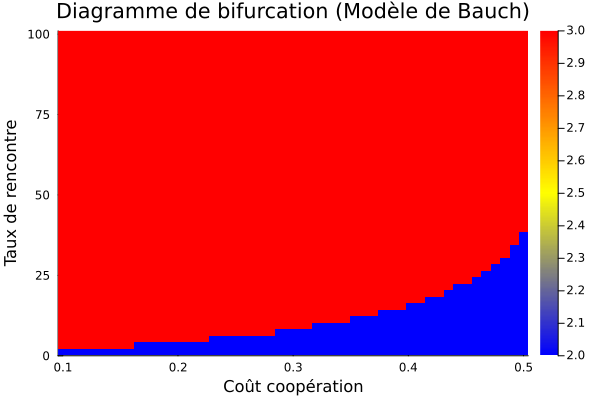

In [61]:
param1 = 0.5
param2 = 0.0
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Rosenbrock23())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)

## Cas $I^{1}$ et $\alpha^{0}$

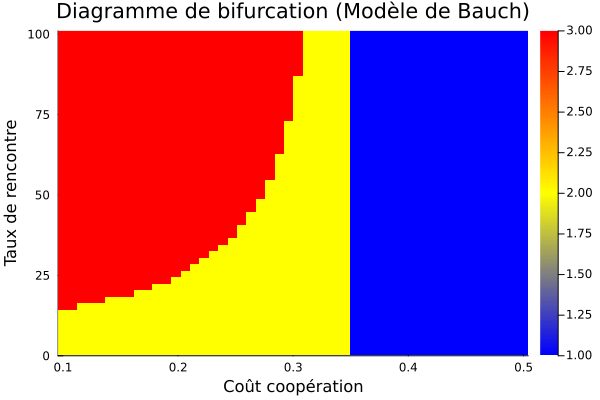

In [62]:
param1 = 1.0
param2 = 0.0
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Vern9())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)

## Cas $I^{0.5}$ et $\alpha^{0.5}$

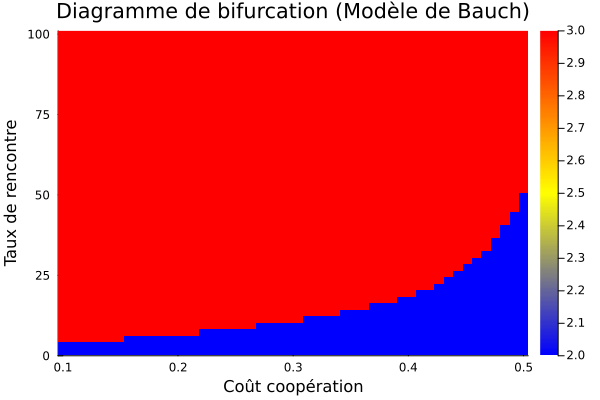

In [63]:
param1 = 0.5
param2 = 0.5
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Rosenbrock23())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)

## Cas $I^{1}$ et $\alpha^{0.5}$

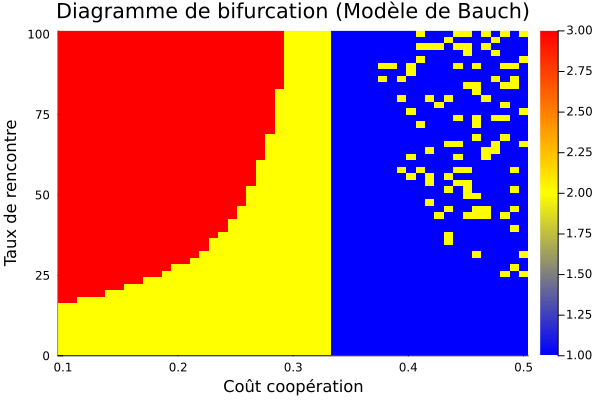

In [64]:
param1 = 1.0
param2 = 0.5
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Rosenbrock32())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)

## Cas $I^{0.5}$ et $\alpha^{1}$

In [65]:
param1 = 0.5
param2 = 1.0
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Vern9())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)

BoundsError: BoundsError: attempt to access 985-element Vector{Float64} at index [-15:985]

## Cas $I^{1}$ et $\alpha^{1}$

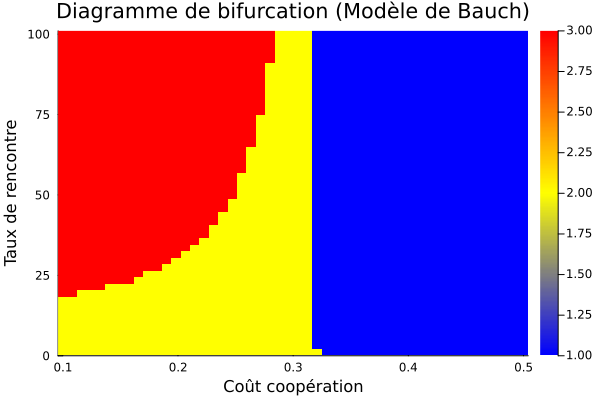

In [66]:
param1 = 1.0
param2 = 1.0
nbr_val = 50
ptime_bif_2 = ParTime(tspan = (0, 4000))

result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Vern9())
# QBDF2

# MEBDF2
# Exp4
# EXPRB53s3
# HochOst4²
# Debugging: Afficher le type et la valeur exacte de result
println("Résultat brut: ", result)
println("Type de résultat: ", typeof(result))
    

Z1 = result  # Maintenant on est sûr que result est un tuple
    
x = range(0.1, stop=0.5, length=nbr_val)
y = range(1, stop=100, length=nbr_val)

plt1 = diagramme(x, y, Z1)


display(plt1)

In [67]:
# vec_forme1 = [0.0,0.0,0.5,0.5,0.5,1.0,1.0,1.0]
# vec_forme2 = [0.5,1.0,0.0,0.5,1.0,0.0,0.5,1.0]

# nbr_val = 50
# ptime_bif_2 = ParTime(tspan = (0, 4000))

# plots1 = []
# plots2 = []

# for y in 1:1
#     param1 = vec_forme1[y]
#     param2 = vec_forme2[y]
#         display(param1)
#         display(param2)
#         result = diagram_bif(nbr_val, ptime_bif_2, param1, param2,Vern9())
        
#         # Debugging: Afficher le type et la valeur exacte de result
#         println("Résultat brut: ", result)
#         println("Type de résultat: ", typeof(result))
        

#         Z1 = result  # Maintenant on est sûr que result est un tuple
        
#         x = range(0.1, stop=0.5, length=nbr_val)
#         y = range(1, stop=100, length=nbr_val)
        
#         plt1 = diagramme(x, y, Z1)


#         display(plt1)

#         # push!(plots1, plt1)
#         # push!(plots2, plt2)
        
# end

# # plot(plots1, layout=(3, 3), size=(900, 900))
# # plot(plots2, layout=(3, 3), size=(900, 900))